# Caution: ***you have to set GPU as V100 High-RAM***
the process requires 15.3GB GPU RAM to train models


[original colab notebook(custom training yolov8 x roboflow)](https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb)

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Sun Dec 17 06:05:48 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0              25W / 300W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 26.2/166.8 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install roboflow
from roboflow import Roboflow

## redo after runtime reset

In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 26.4/166.8 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

Downloads from my google drive

In [4]:
!pip install gdown

## Donwload datasets

In [5]:
%cd /content

/content


In [6]:
!gdown https://drive.google.com/uc?id=1-1ORlN7z6IUjWrCZ1jvkAjl7HZgC52se  # for files
# https://drive.google.com/file/d/1-1ORlN7z6IUjWrCZ1jvkAjl7HZgC52se/view?usp=drive_link

Downloading...
From: https://drive.google.com/uc?id=1-1ORlN7z6IUjWrCZ1jvkAjl7HZgC52se
To: /content/trademark-logo-detection-3.zip
100% 2.71G/2.71G [00:30<00:00, 89.2MB/s]


## Custom Training

In [7]:
!mkdir {HOME}/datasets

In [ ]:
!unzip /content/trademark-logo-detection-3.zip -d /content/

In [9]:
!mv /content/trademark-logo-detection-3/ datasets

In [10]:
%cd {HOME}
# !yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml batch=2048 imgsz=640 epochs=10 plots=True #test failed mem over(batch 1024,512, 256 same error)
# !yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml batch= imgsz=640 epochs=10 plots=True #test #128 ko
# !yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml batch=32 plots=True #test 32 ok
!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/trademark-logo-detection-3/data.yaml epochs=150 batch=64 plots=True #test 64 ok


/content
100% 21.5M/21.5M [00:00<00:00, 50.4MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/trademark-logo-detection-3/data.yaml, epochs=150, patience=50, batch=64, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, fo

In [11]:
!ls {HOME}/runs/detect/train

args.yaml					    train_batch0.jpg  train_batch2.jpg
events.out.tfevents.1702793410.509ae27fed50.2409.0  train_batch1.jpg  weights


In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


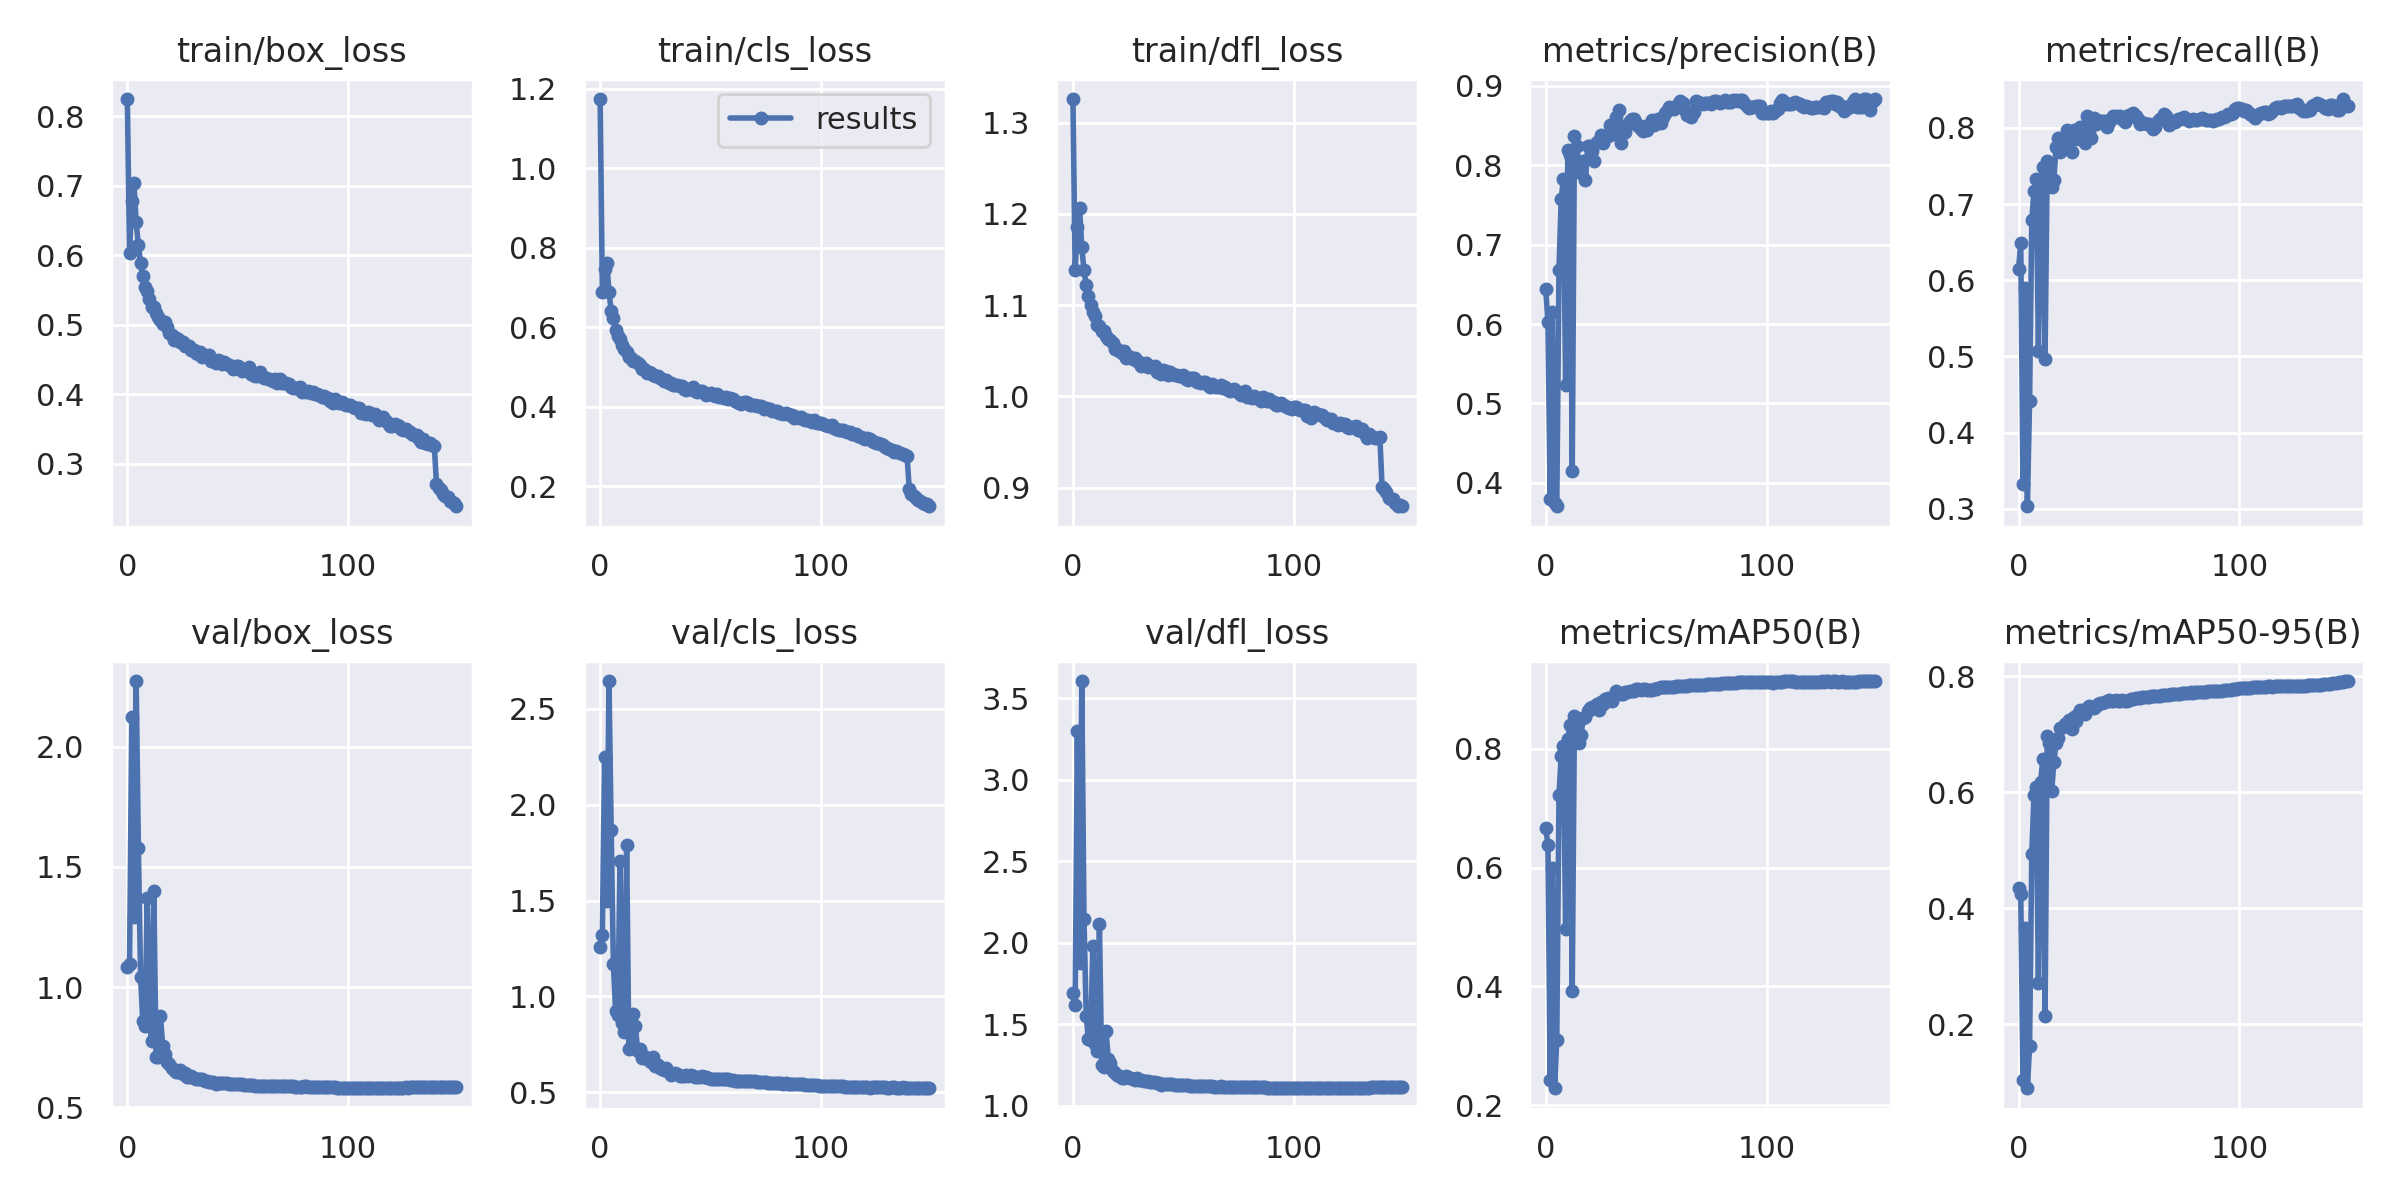

In [ ]:
# %cd {HOME}
# Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


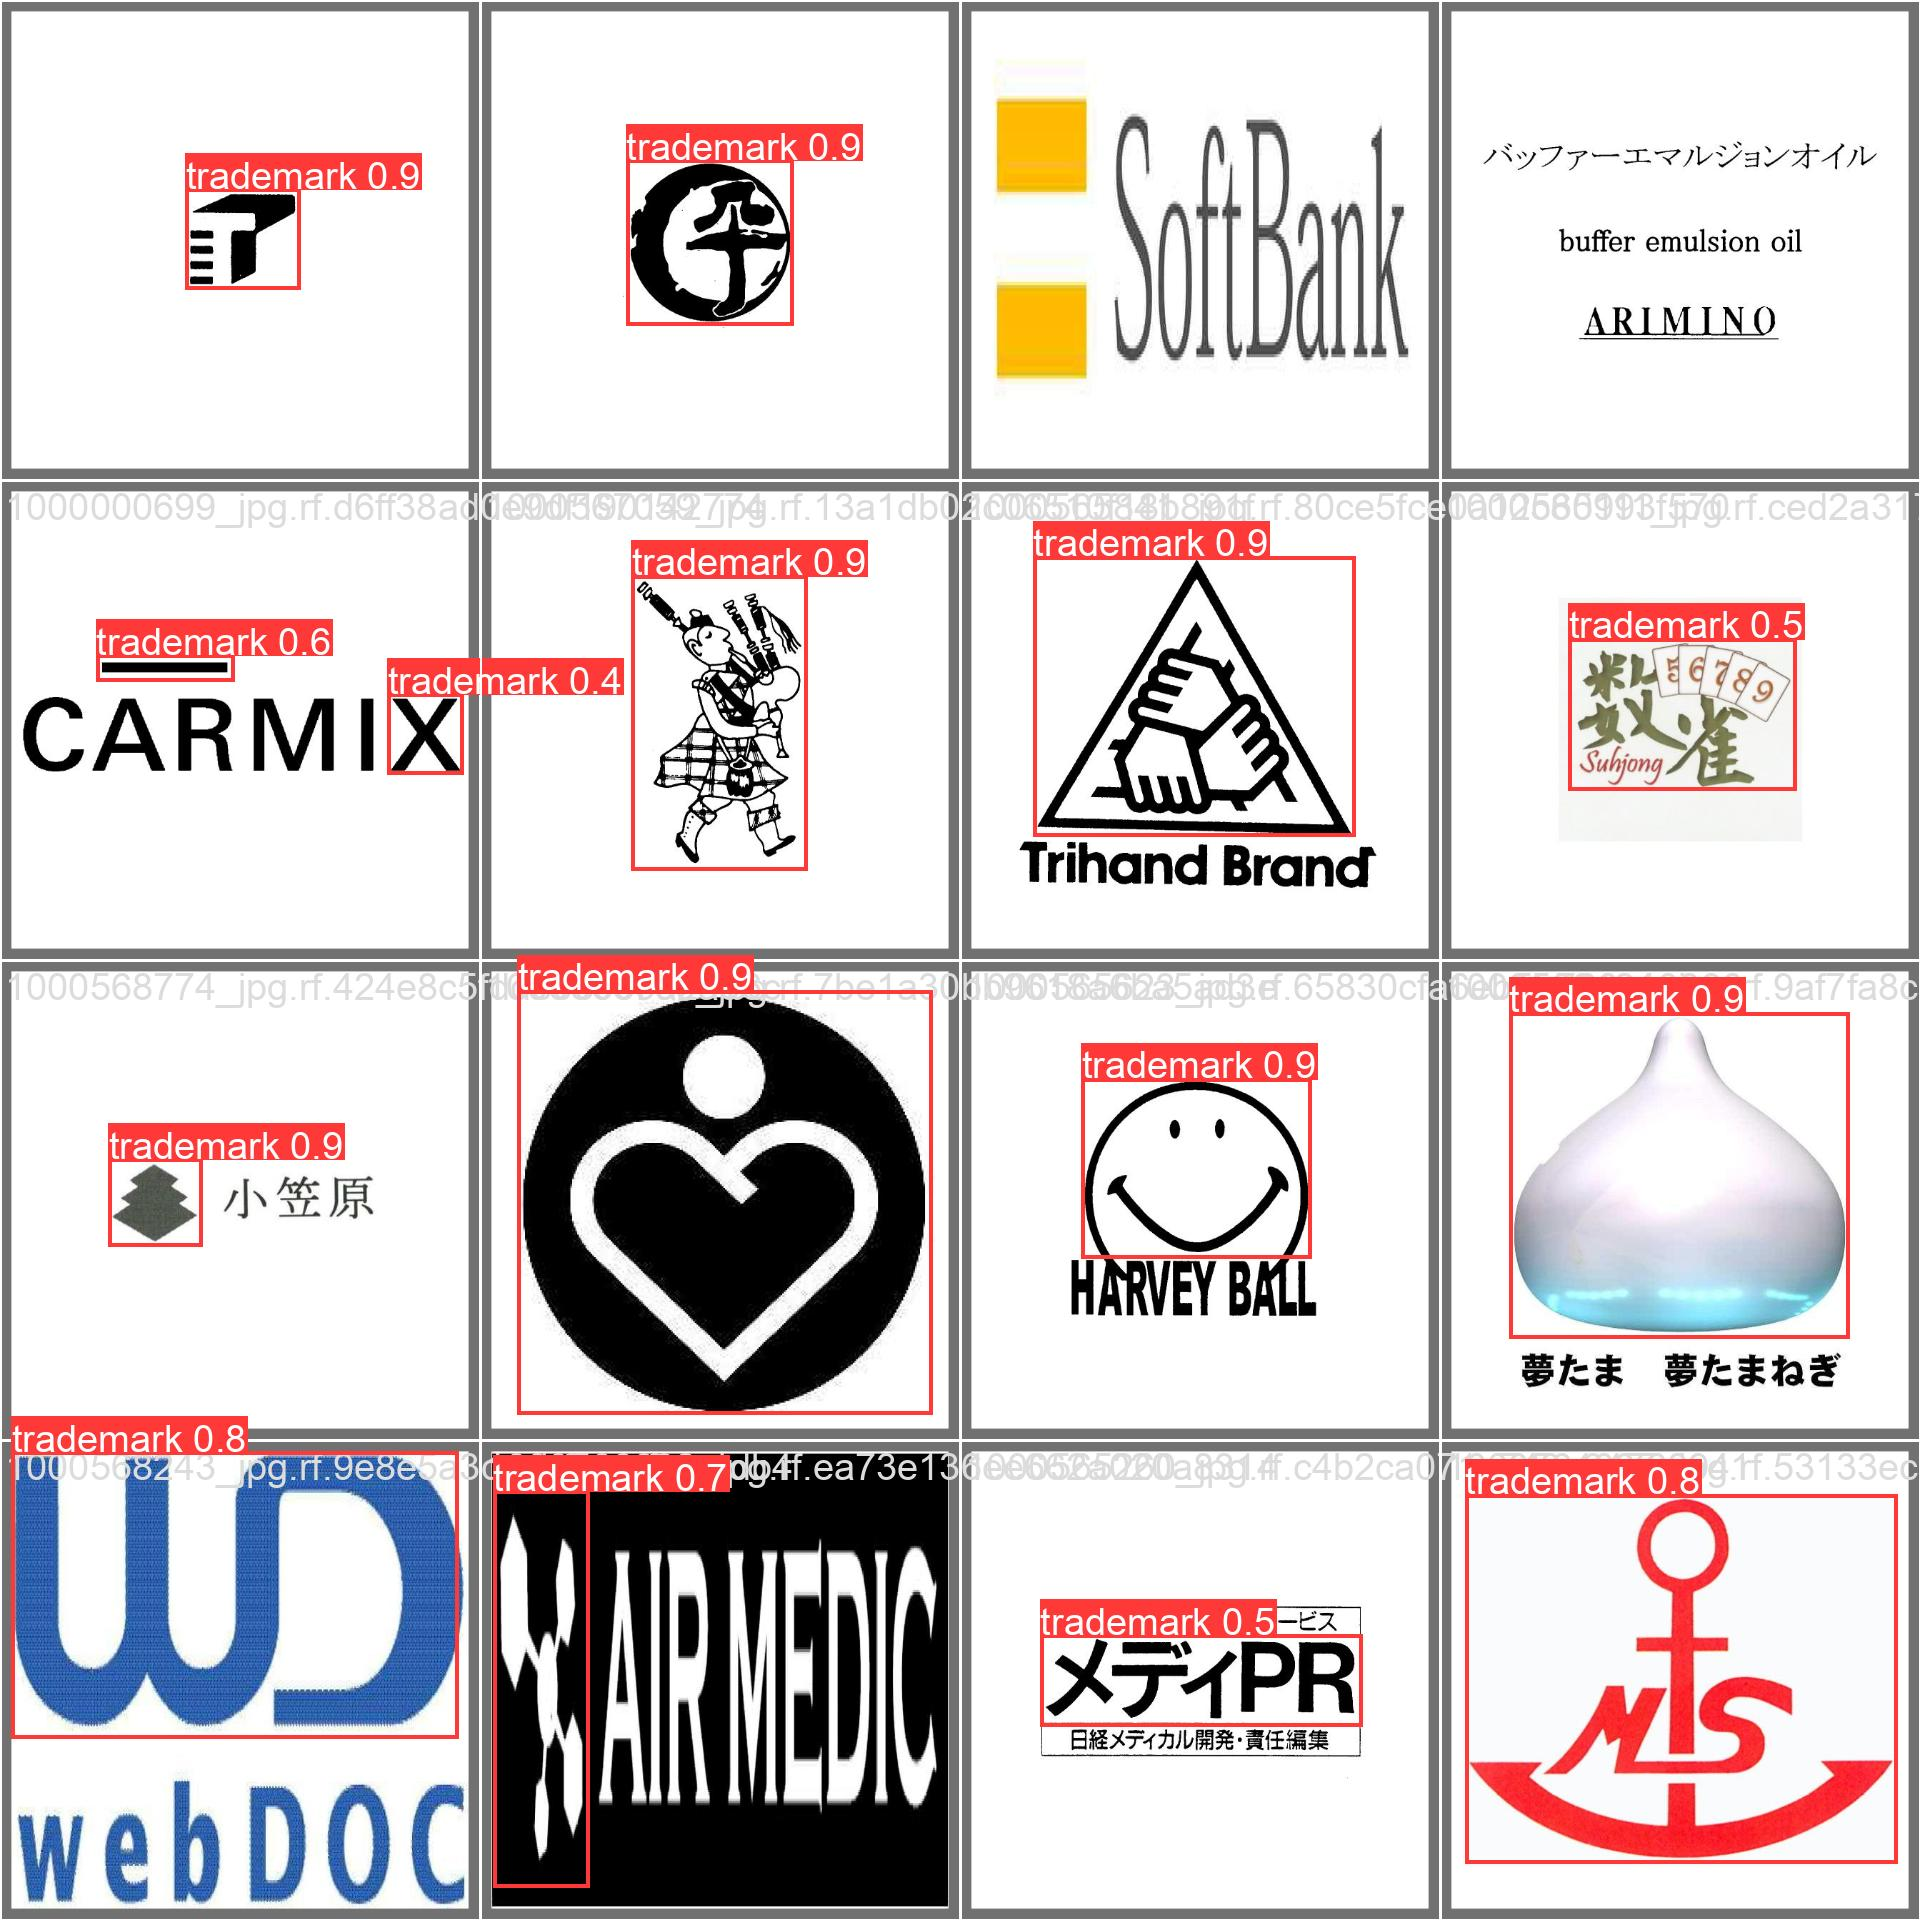

In [ ]:
# %cd {HOME}
# Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/datasets/trademark-logo-detection-3/data.yaml

/content
2023-11-07 19:06:07.067803: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-07 19:06:07.067852: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-07 19:06:07.067886: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-07 19:06:07.076272: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-07 19:06:08.225117: W tensorflow/

## Inference with Custom Model

In [ ]:
!echo {dataset.location}

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/trademark-logo-detection-3/test/images save=True

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

i=0
for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg'):#[:50]:
      display(Image(filename=image_path, width=600))
      print("\n")
      if (i == 50):
            break
      i=i+1

# You should save models to your colab directory

In [13]:
%cd /content/

/content


In [14]:
!ls

datasets  drive  runs  trademark-logo-detection-3.zip  yolov8s.pt


In [16]:
!mkdir /content/yolov8_trained

In [17]:
!cp -r datasets runs /content/yolov8_trained

In [ ]:
!zip -r /content/yolov8_trained_epoch64_v3_00.zip /content/yolov8_trained

In [ ]:
!cp /content/yolov8_trained_epoch64_v3_00.zip "your_directory_to_save"

In [ ]:
# !cp /content/runs/detect/train/weights/best.pt /content/drive/MyDrive/image_search_competition/try-preprocess-env/actual-yolov8-detection/best_v3_00.pt